In [29]:
import torch
import torch.nn as nn 
from torchvision import models, datasets, transforms
from torchvision.models import ResNet50_Weights
import torchvision.transforms.functional as TF
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from sklearn.model_selection import train_test_split
import cv2
import os
import sys
sys.path.append('/Users/anhyojun/WorkSpace/KDT/MyModule')
from KDTModule import *

from sklearn.

In [30]:
# 이미지 전처리(transform) 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),          # 텐서로 변환
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet 정규화 값
])

# 이미지 경로
ROOT_PATH = '/Users/anhyojun/WorkSpace/LocalData/방범대'

# ImageFolder 사용
DS = datasets.ImageFolder(root=ROOT_PATH, transform=transform)
# DataLoader
DL = DataLoader(DS, batch_size = 32, shuffle=True)

print(DS.classes)
print(f'데이터 개수 : {len(DL.dataset)}')

['맹구', '유리', '짱구', '철수', '훈이']
데이터 개수 : 25864


In [31]:
labels = [DS[i][1] for i in range(len(DS))]

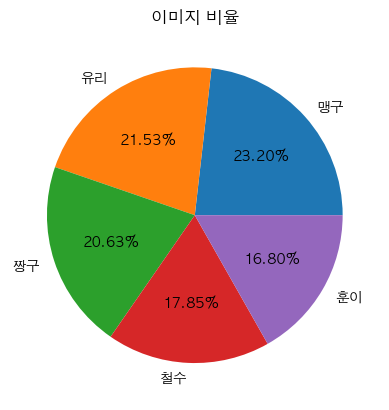

In [32]:
plt.pie(pd.DataFrame(labels).value_counts(), labels=DS.classes,
        autopct='%.2f%%')
plt.title('이미지 비율')
plt.show()

In [33]:
file_path = [i[0] for i in DS.imgs]
labels = [i[1] for i in DS.imgs]

In [34]:
train_path, test_path, train_labels, test_labels = train_test_split(file_path, labels, stratify=labels,
                                                                    random_state = 42, train_size = 0.8)
train_path, valid_path, train_labels, valid_labels = train_test_split(train_path, train_labels,
                                                                      stratify=train_labels,
                                                                      random_state = 42, train_size = 0.8)

In [35]:
class ImagePathDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        super().__init__()
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform != None:
            image = self.transform(image)

        # 레이블 불러오기
        label = self.labels[idx]

        return image, label

In [36]:
trainDS = ImagePathDataset(train_path, train_labels, transform=transform)
validDS = ImagePathDataset(valid_path, valid_labels, transform=transform)
testDS = ImagePathDataset(test_path, test_labels, transform=transform)

trainDL = DataLoader(trainDS, batch_size = 16)
validDL = DataLoader(validDS, batch_size = 16)
testDL = DataLoader(testDS, batch_size = 16)

In [37]:
# 원본 이미지 경로
ROOT_PATH = '/Users/anhyojun/WorkSpace/LocalData/방범대 원본'

# ImageFolder 사용
originDS = datasets.ImageFolder(root=ROOT_PATH)

print(originDS.classes)
print(f'데이터 개수 : {len(originDS)}')

['맹구', '유리', '짱구', '훈이', '철수']
데이터 개수 : 3233


In [7]:
# # 이미지 회전해서 증강하기
# # 회전된 이미지 경로
# SAVE_PATH_90 = '/Users/anhyojun/WorkSpace/LocalData/방범대_회전'

# for i in range(len(originDS)):
#     for j in [0, 90, 180, 270]:
#         class_name = originDS.classes[originDS[i][1]]
#         FILE_PATH = os.path.join(SAVE_PATH_90, class_name, f'img_index{i}_{j}.jpg')
#         FILE_PATH2 = os.path.join(SAVE_PATH_90, class_name, f'flip_img_index{i}_{j}.jpg')
#         rotate_img = originDS[i][0].rotate(j, expand=True)
#         flipped_img = rotate_img.transpose(Image.FLIP_LEFT_RIGHT)
#         rotate_img.save(FILE_PATH)
#         flipped_img.save(FILE_PATH2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


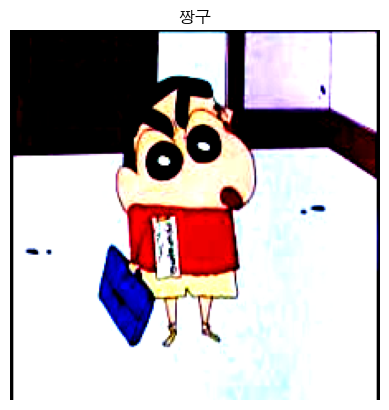

In [38]:
def draw_shin_chan(INDEX):
    name_dict = {i : DS.classes[i] for i in range(len(DS.classes))}
    plt.rc('font', family='AppleGothic')
    a = trainDL.dataset[INDEX][0].permute(1,2,0)
    plt.axis('off')
    plt.title(name_dict[trainDL.dataset[INDEX][1]])
    plt.imshow(a)
    plt.show()

draw_shin_chan(0)

In [39]:
# 미리 학습된 ResNet 모델 불러오기 (weight 사용)
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# 합성곱층 가중치 고정
for param in model.parameters():
    param.requires_grad = False

# 전결합층 가중치 변경하도록 설정
for param in model.fc.parameters():
    param.requires_grad = True

In [40]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
# 마지막 레이어 (full connected layer) 교체 (클래스 5개로 변경)
num_features = model.fc.in_features # 2048
model.fc = nn.Linear(num_features, 5) # 입력은 이전 층의 아웃을 그대로 받고 출력은 방법대 인원

In [12]:
print(trainDL.dataset[0][0].shape)
print(trainDL.dataset[0][1])

torch.Size([3, 224, 224])
2


In [41]:
# MPS 사용 여부 확인하기
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"device : {device}")

device : mps


In [13]:
# 훈련
EPOCH = 100
SAVE_PATH = '/Users/anhyojun/WorkSpace/KDT/김소현 강사님/프로젝트/5번째 프로젝트/model'

# 옵티마이저를 모델 파라미터에 대해 초기화
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

result = training(trainDL, validDL, model, model_type = 'multiclass', optimizer = optimizer,
                  epoch = EPOCH, endurance_cnt = 5, view_epoch = 1, num_classes = 5, SAVE_PATH = SAVE_PATH,
                  MPS = True, device = device)

[EPOCH] : 1에서 모델 저장 완료.
[Loss : 1/40] Train : 0.6125, Test : 0.3636
[Score  : 1/40] Train : 0.7803, Test : 0.8744
[EPOCH] : 2에서 모델 저장 완료.
[Loss : 2/40] Train : 0.3295, Test : 0.3019
[Score  : 2/40] Train : 0.8849, Test : 0.8913
[EPOCH] : 3에서 모델 저장 완료.
[Loss : 3/40] Train : 0.2778, Test : 0.2784
[Score  : 3/40] Train : 0.9021, Test : 0.8983
[EPOCH] : 4에서 모델 저장 완료.
[Loss : 4/40] Train : 0.2463, Test : 0.2652
[Score  : 4/40] Train : 0.9143, Test : 0.9012
[EPOCH] : 5에서 모델 저장 완료.
[Loss : 5/40] Train : 0.2230, Test : 0.2560
[Score  : 5/40] Train : 0.9234, Test : 0.9041
[EPOCH] : 6에서 모델 저장 완료.
[Loss : 6/40] Train : 0.2044, Test : 0.2485
[Score  : 6/40] Train : 0.9306, Test : 0.9089
[EPOCH] : 7에서 모델 저장 완료.
[Loss : 7/40] Train : 0.1890, Test : 0.2419
[Score  : 7/40] Train : 0.9357, Test : 0.9107
[EPOCH] : 8에서 모델 저장 완료.
[Loss : 8/40] Train : 0.1759, Test : 0.2358
[Score  : 8/40] Train : 0.9405, Test : 0.9124
[EPOCH] : 9에서 모델 저장 완료.
[Loss : 9/40] Train : 0.1646, Test : 0.2302
[Score  : 9/40] Trai

RuntimeError: MPS backend out of memory (MPS allocated: 1.12 GB, other allocations: 7.89 GB, max allowed: 9.07 GB). Tried to allocate 49.00 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

In [46]:
best_model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

best_model.fc = nn.Linear(best_model.fc.in_features, 5)
best_model.load_state_dict(torch.load('best_model_epoch_41.pth', weights_only=True))

<All keys matched successfully>

In [59]:
accuracy_list = []
pred_value_list = []
target_list = []
for input, target in testDL:
    best_model.eval()
    pred = best_model(input)
    pred_value = torch.argmax(pred, dim = 1)
    accuracy = sum(pred_value == target) / len(target)
    pred_value_list.append(pred_value)
    target_list.append(target)
    accuracy_list.append(accuracy)

In [58]:
total_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f"[test accuracy] : {total_accuracy.item():.4f}")

[test accuracy] : 0.9419


In [66]:
import torch
from sklearn.metrics import classification_report

# pred_value_list와 target_list를 하나의 리스트로 변환
preds = torch.cat(pred_value_list).cpu().numpy()
targets = torch.cat(target_list).cpu().numpy()

# classification_report 출력
report = classification_report(targets, preds)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1114
           1       0.96      0.95      0.96      1067
           2       0.95      0.89      0.92       923
           3       0.96      0.95      0.95       869
           4       0.88      0.99      0.93      1200

    accuracy                           0.94      5173
   macro avg       0.95      0.94      0.94      5173
weighted avg       0.94      0.94      0.94      5173

